**Chương 11 – Huấn luyện Mạng Nơ-ron Sâu**

_Notebook này sẽ chứa tất cả các mã lập trình mẫu và lời giải cho các bài tập trong chương 11._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mlbvn/handson-ml2-vn/blob/master/11_training_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mlbvn/handson-ml2-vn/blob/master/11_training_deep_neural_networks.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Cài đặt

Đầu tiên hãy nhập một vài mô-đun thông dụng, đảm bảo rằng Matplotlib sẽ vẽ đồ thị ngay trong notebook, và chuẩn bị một hàm để lưu đồ thị. Ta cũng kiểm tra xem Python phiên bản từ 3.5 trở lên đã được cài đặt hay chưa (mặc dù Python 2.x vẫn có thể hoạt động, phiên bản này đã không còn sử dụng nên chúng tôi rất khuyến khích việc sử dụng Python 3), cũng như Scikit-Learn ≥ 0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Vấn đề Tiêu biến/Bùng nổ Gradient

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


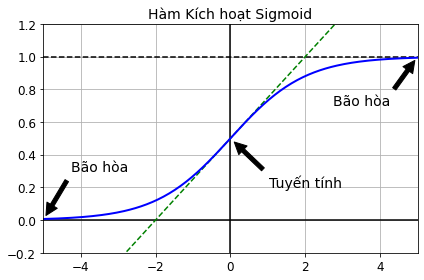

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Bão hòa', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Bão hòa', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Tuyến tính', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Hàm Kích hoạt Sigmoid", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

## Khởi tạo Xaiver và He

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## Các Hàm Kích hoạt Không bão hòa

### Leaky ReLU

In [8]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


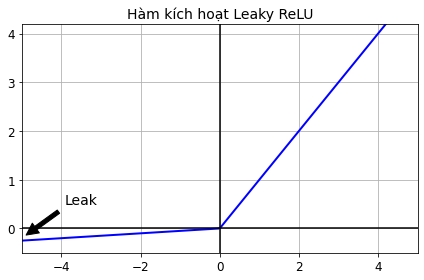

In [9]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Hàm kích hoạt Leaky ReLU", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [10]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [11]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

Hãy huấn luyện một mạng nơ-ron trên Fashion MNIST bằng Leaky ReLU:

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.6314 - accuracy: 0.5054 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 2s 892us/step - loss: 0.8416 - accuracy: 0.7247 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 2s 879us/step - loss: 0.7053 - accuracy: 0.7637 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 2s 883us/step - loss: 0.6325 - accuracy: 0.7908 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 2s 887us/step - loss: 0.5992 - accuracy: 0.8021 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 2s 881us/step - loss: 0.5624 - accuracy: 0.8142 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 892us/step - loss: 0.5379 - accuracy: 0.8217 - val_loss: 0.5157 - v

Bây giờ hãy thử PReLU:

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.6969 - accuracy: 0.4974 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 2s 990us/step - loss: 0.8706 - accuracy: 0.7247 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 2s 980us/step - loss: 0.7211 - accuracy: 0.7621 - val_loss: 0.6564 - val_accuracy: 0.7882
Epoch 4/10
1719/1719 [==============================] - 2s 985us/step - loss: 0.6447 - accuracy: 0.7879 - val_loss: 0.6003 - val_accuracy: 0.8048
Epoch 5/10
1719/1719 [==============================] - 2s 967us/step - loss: 0.6077 - accuracy: 0.8004 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 2s 984us/step - loss: 0.5692 - accuracy: 0.8118 - val_loss: 0.5406 - val_accuracy: 0.8236
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5428 - accuracy: 0.8194 - val_loss: 0.5196 - val

### ELU

In [13]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


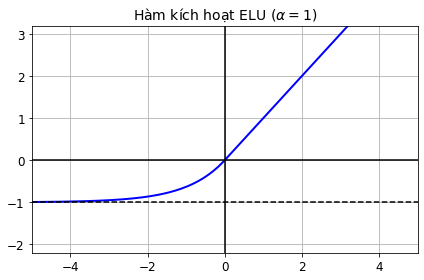

In [14]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"Hàm kích hoạt ELU ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

Sử dụng ELU trong TensorFlow rất đơn giản, chỉ cần chỉ định hàm kích hoạt này khi xây dựng từng tầng:

In [20]:
keras.layers.Dense(10, activation="elu")

### SELU

Chức năng kích hoạt này đã được giới thiệu trong [bài báo tuyệt vời](https://arxiv.org/pdf/1706.02515.pdf) này của Günter Klambauer, Thomas Unterthiner và Andreas Mayr, được xuất bản vào tháng 6 năm 2017. Trong quá trình huấn luyện, một mạng nơ-ron chỉ bao gồm một chồng các tầng dày đặc sử dụng hàm kích hoạt SELU và khởi tạo LeCun sẽ tự chuẩn hóa: đầu ra của mỗi tầng sẽ có xu hướng duy trì cùng một giá trị trung bình và phương sai trong quá trình huấn luyện, giúp giải quyết vấn đề tiêu biến/bùng nổ gradient. 

Kết quả là, hàm kích hoạt này vượt trội hơn rất nhiều so với các hàm kích hoạt khác đối với kiểu mạng nơ-ron như trên, cho nên bạn thực sự nên dùng thử nó. Thật không may, tính năng tự chuẩn hóa của hàm kích hoạt SELU dễ bị hỏng: bạn không thể sử dụng chuẩn hóa ℓ<sub>1</sub> hoặc ℓ<sub>2</sub>, dropout, định mức tối đa, kết nối tắt hoặc các cấu trúc liên kết không tuần tự khác (vì vậy các mạng nơ-ron hồi tiếp sẽ không tự chuẩn hóa). Tuy nhiên, trong thực tế, nó hoạt động khá tốt với các CNN tuần tự. Nếu bạn phá vỡ quá trình tự chuẩn hóa, SELU sẽ không nhất thiết hoạt động tốt hơn so với các hàm kích hoạt khác.

In [15]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [16]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


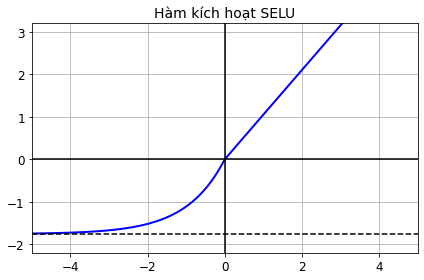

In [17]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("Hàm kích hoạt SELU", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

Mặc định, siêu tham số SELU (`scale` và `alpha`) được điều chỉnh sao cho đầu ra trung bình của mỗi nơ-ron gần bằng 0 và độ lệch chuẩn gần bằng 1 (giả sử đầu vào được chuẩn hóa với giá trị trung bình bằng 0 và độ lệch chuẩn 1 nữa). Sử dụng hàm kích hoạt này, ngay cả mạng nơ-ron sâu 1.000 tầng cũng duy trì giá trị trung bình gần bằng 0 và độ lệch chuẩn 1 trên tất cả các tầng, tránh được vấn đề độ dốc bùng nổ/tiêu biến:

In [24]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


Sử dụng SELU khá dễ:

In [25]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

Hãy tạo một mạng nơ-ron cho Fashion MNIST với 100 tầng ẩn, sử dụng hàm kích hoạt SELU:

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Bây giờ hãy huấn luyện nó. Đừng quên chia tỷ lệ đầu vào thành giá trị trung bình 0 và độ lệch chuẩn 1:

In [29]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 12s 6ms/step - loss: 1.3556 - accuracy: 0.4808 - val_loss: 0.7711 - val_accuracy: 0.6858
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7537 - accuracy: 0.7235 - val_loss: 0.7534 - val_accuracy: 0.7384
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7451 - accuracy: 0.7357 - val_loss: 0.5943 - val_accuracy: 0.7834
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5699 - accuracy: 0.7906 - val_loss: 0.5434 - val_accuracy: 0.8066
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5569 - accuracy: 0.8051 - val_loss: 0.4907 - val_accuracy: 0.8218


Bây giờ hãy xem điều gì sẽ xảy ra nếu chúng ta sử dụng hàm kích hoạt ReLU thay thế:

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [34]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 11s 5ms/step - loss: 2.0460 - accuracy: 0.1919 - val_loss: 1.5971 - val_accuracy: 0.3048
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 1.2654 - accuracy: 0.4591 - val_loss: 0.9156 - val_accuracy: 0.6372
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9312 - accuracy: 0.6169 - val_loss: 0.8928 - val_accuracy: 0.6246
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8188 - accuracy: 0.6710 - val_loss: 0.6914 - val_accuracy: 0.7396
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7288 - accuracy: 0.7152 - val_loss: 0.6638 - val_accuracy: 0.7380


Có vẻ không khả quan lắm, ta đang gặp phải vấn đề tiêu biến/bùng nổ gradient.

# Chuẩn hóa theo Batch

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_212 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_213 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_214 (Dense)            (None, 10)               

In [37]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [38]:
#bn1.updates #deprecated

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [40]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.2287 - accuracy: 0.5993 - val_loss: 0.5526 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5996 - accuracy: 0.7959 - val_loss: 0.4725 - val_accuracy: 0.8468
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5312 - accuracy: 0.8168 - val_loss: 0.4375 - val_accuracy: 0.8558
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4884 - accuracy: 0.8294 - val_loss: 0.4153 - val_accuracy: 0.8596
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4717 - accuracy: 0.8343 - val_loss: 0.3997 - val_accuracy: 0.8640
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4420 - accuracy: 0.8461 - val_loss: 0.3867 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4285 - accuracy: 0.8496 - val_loss: 0.3763 - val_accuracy:

Đôi khi áp dụng BN trước hàm kích hoạt cho kết quả tốt hơn (có một cuộc tranh luận về chủ đề này). Ngoài ra, tầng trước tầng `BatchNormalization` không cần phải có các hệ số điều chỉnh. Tầng `BatchNormalization` cũng có một số hệ số, do đó có thể dẫn đến lãng phí các tham số. Để tránh điều này ta có thể đặt `use_bias=False` khi tạo các tầng đó:

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.3677 - accuracy: 0.5604 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7136 - accuracy: 0.7702 - val_loss: 0.5566 - val_accuracy: 0.8184
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6123 - accuracy: 0.7990 - val_loss: 0.5007 - val_accuracy: 0.8360
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5547 - accuracy: 0.8148 - val_loss: 0.4666 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5255 - accuracy: 0.8230 - val_loss: 0.4434 - val_accuracy: 0.8534
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4947 - accuracy: 0.8328 - val_loss: 0.4263 - val_accuracy: 0.8550
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4736 - accuracy: 0.8385 - val_loss: 0.4130 - val_accuracy:

## Gọt Gradient

Tất cả các trình tối ưu hóa Keras đều chấp nhận các đối số `clipnorm` hoặc `clipvalue`:

In [44]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [45]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## Tái sử dụng các Tầng Tiền huấn luyện

### Tái sử dụng một mô hình Keras

Hãy chia tập huấn luyện thời trang MNIST thành hai phần:
* `X_train_A`: tất cả hình ảnh của tất cả các mặt hàng trừ xăng-đan và áo (lớp 5 và lớp 6).
* `X_train_B`: một tập huấn luyện nhỏ hơn nhiều chỉ gồm 200 hình ảnh đầu tiên về xăng-đan hoặc áo.

Tập kiểm định và tập kiểm tra cũng được phân chia theo cách này nhưng không hạn chế số lượng hình ảnh.

Chúng ta sẽ huấn luyện một mô hình trên tập A (tác vụ phân loại có 8 lớp) và cố gắng sử dụng lại nó để giải quyết tập B (phân loại nhị phân). Ta hy vọng sẽ chuyển một chút kiến thức từ tác vụ A sang tác vụ B, vì các lớp trong nhóm A (giày thể thao, giày cổ cao, áo khoác, áo phông, v.v.) có phần giống với các lớp trong nhóm B (xăng-đan và áo sơ mi). 

Tuy nhiên, vì chúng ta đang sử dụng các lớp `Dense`, nên chỉ các khuôn mẫu xảy ra ở cùng một vị trí thì mới có thể được sử dụng lại (ngược lại, các tầng tích chập sẽ chuyển kiến thức tốt hơn nhiều, vì các khuôn mẫu đã học có thể được phát hiện ở bất kỳ đâu trên hình ảnh, như chúng ta sẽ thấy trong chương CNN).

In [46]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [47]:
X_train_A.shape

(43986, 28, 28)

In [48]:
X_train_B.shape

(200, 28, 28)

In [49]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [50]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [51]:
tf.random.set_seed(42)
np.random.seed(42)

In [52]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [53]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [54]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.9249 - accuracy: 0.6994 - val_loss: 0.3896 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 1s 1ms/step - loss: 0.3651 - accuracy: 0.8745 - val_loss: 0.3288 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 1s 989us/step - loss: 0.3182 - accuracy: 0.8897 - val_loss: 0.3013 - val_accuracy: 0.8991
Epoch 4/20
1375/1375 [==============================] - 1s 1ms/step - loss: 0.3048 - accuracy: 0.8954 - val_loss: 0.2896 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 1s 1ms/step - loss: 0.2804 - accuracy: 0.9029 - val_loss: 0.2773 - val_accuracy: 0.9061
Epoch 6/20
1375/1375 [==============================] - 1s 1ms/step - loss: 0.2701 - accuracy: 0.9075 - val_loss: 0.2735 - val_accuracy: 0.9066
Epoch 7/20
1375/1375 [==============================] - 1s 1ms/step - loss: 0.2627 - accuracy: 0.9093 - val_loss: 0.2721 - val_accurac

In [55]:
model_A.save("my_model_A.h5")

In [56]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [57]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [58]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 29ms/step - loss: 1.0360 - accuracy: 0.4975 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 0.5883 - accuracy: 0.6971 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 0.4380 - accuracy: 0.8854 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 0.4021 - accuracy: 0.8712 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 0.3361 - accuracy: 0.9348 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.3113 - accuracy: 0.9233 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2817 - accuracy: 0.9299 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [============

In [59]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_29 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_30 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_31 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_32 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                

In [60]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

Lưu ý rằng `model_B_on_A` và `model_A` hiện tại chia sẻ các tầng với nhau, vì vậy khi chúng ta huấn luyện một tầng, nó sẽ cập nhật cả hai mô hình. Nếu muốn tránh điều này, ta cần xây dựng `model_B_on_A` trên một *bản sao* của `model_A`:

In [61]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [62]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [63]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 29ms/step - loss: 0.2575 - accuracy: 0.9487 - val_loss: 0.2797 - val_accuracy: 0.9270
Epoch 2/4
7/7 [==============================] - 0s 9ms/step - loss: 0.2566 - accuracy: 0.9371 - val_loss: 0.2701 - val_accuracy: 0.9300
Epoch 3/4
7/7 [==============================] - 0s 9ms/step - loss: 0.2473 - accuracy: 0.9332 - val_loss: 0.2613 - val_accuracy: 0.9341
Epoch 4/4
7/7 [==============================] - 0s 10ms/step - loss: 0.2450 - accuracy: 0.9463 - val_loss: 0.2531 - val_accuracy: 0.9391
Epoch 1/16
7/7 [==============================] - 1s 29ms/step - loss: 0.2106 - accuracy: 0.9524 - val_loss: 0.2045 - val_accuracy: 0.9615
Epoch 2/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1738 - accuracy: 0.9526 - val_loss: 0.1719 - val_accuracy: 0.9706
Epoch 3/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1451 - accuracy: 0.9660 - val_loss: 0.1491 - val_accuracy: 0.9807
Epoch 4/16
7/7 [===================

Vậy kết quả cuối cùng là như thế nào?

In [64]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 714us/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [65]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 751us/step - loss: 0.0562 - accuracy: 0.9940


[0.0561506561934948, 0.9940000176429749]

Tuyệt vời! Chúng ta đã nhận được khá nhiều chuyển giao: tỷ lệ lỗi giảm xuống 4,9 lần!

In [66]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

# Các Bộ tối ưu nhanh hơn

## Tối ưu Momentum

In [67]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

## Tăng tốc Gradient Nesterov

In [68]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [69]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

## RMSProp

In [70]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

## Adam Optimization

In [71]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [72]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [73]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Định thời Tốc độ học

### Định thời Lũy thừa

```lr = lr0 / (1 + steps / s)**c```
* Keras uses `c=1` and `s = 1 / decay`

In [74]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [75]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [76]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5980 - accuracy: 0.7933 - val_loss: 0.4031 - val_accuracy: 0.8598
Epoch 2/25
1719/1719 [==============================] - 2s 954us/step - loss: 0.3829 - accuracy: 0.8636 - val_loss: 0.3714 - val_accuracy: 0.8720
Epoch 3/25
1719/1719 [==============================] - 2s 943us/step - loss: 0.3491 - accuracy: 0.8771 - val_loss: 0.3746 - val_accuracy: 0.8738
Epoch 4/25
1719/1719 [==============================] - 2s 954us/step - loss: 0.3277 - accuracy: 0.8814 - val_loss: 0.3502 - val_accuracy: 0.8798
Epoch 5/25
1719/1719 [==============================] - 2s 934us/step - loss: 0.3172 - accuracy: 0.8856 - val_loss: 0.3453 - val_accuracy: 0.8780
Epoch 6/25
1719/1719 [==============================] - 2s 919us/step - loss: 0.2922 - accuracy: 0.8940 - val_loss: 0.3419 - val_accuracy: 0.8820
Epoch 7/25
1719/1719 [==============================] - 2s 921us/step - loss: 0.2870 - accuracy: 0.8973 - val_loss: 0.3362 - v

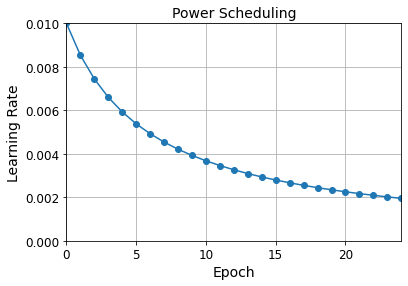

In [77]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Tốc độ học")
plt.title("Hoạch định Lũy thừa", fontsize=14)
plt.grid(True)
plt.show()

### Định thời Cấp số nhân

```lr = lr0 * 0.1**(epoch / s)```

In [78]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [79]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [80]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [81]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1122 - accuracy: 0.7363 - val_loss: 0.8947 - val_accuracy: 0.7496
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7354 - accuracy: 0.7825 - val_loss: 0.6059 - val_accuracy: 0.8122
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5973 - accuracy: 0.8175 - val_loss: 0.8195 - val_accuracy: 0.7754
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6040 - accuracy: 0.8148 - val_loss: 0.6135 - val_accuracy: 0.8398
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5462 - accuracy: 0.8323 - val_loss: 0.5075 - val_accuracy: 0.8490
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4479 - accuracy: 0.8555 - val_loss: 0.4538 - val_accuracy: 0.8502
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4225 - accuracy: 0.8622 - val_loss: 0.4792 - val_accuracy:

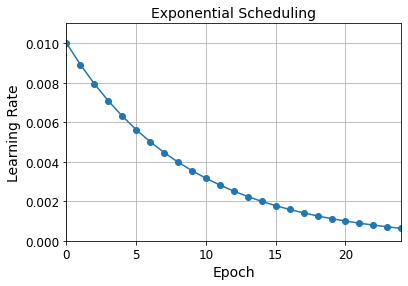

In [82]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Tốc độ học")
plt.title("Hoạch định cấp số mũ", fontsize=14)
plt.grid(True)
plt.show()

Hàm hoạch định có thể lấy tốc độ học hiện tại làm đối số thứ hai:

In [83]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

Nếu bạn muốn cập nhật tốc độ học tập ở mỗi lần lặp thay vì ở mỗi epoch, bạn phải viết lớp gọi lại của riêng mình:

In [84]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1153 - accuracy: 0.7390 - val_loss: 0.9588 - val_accuracy: 0.7338
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6929 - accuracy: 0.7934 - val_loss: 0.5328 - val_accuracy: 0.8318
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6317 - accuracy: 0.8097 - val_loss: 0.7656 - val_accuracy: 0.8278
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5827 - accuracy: 0.8258 - val_loss: 0.5585 - val_accuracy: 0.8382
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5041 - accuracy: 0.8407 - val_loss: 0.5367 - val_accuracy: 0.8574
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4595 - accuracy: 0.8588 - val_loss: 0.6000 - val_accuracy: 0.8516
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4490 - accuracy: 0.8644 - val_loss: 0.4605 - val_accuracy:

In [85]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

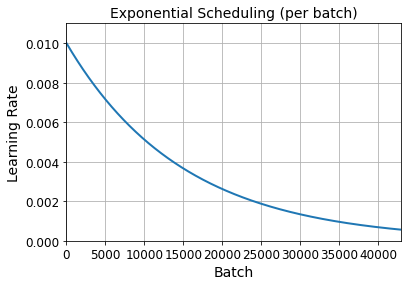

In [86]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Tốc độ học")
plt.title("Hoạch định cấp số mũ (trên mỗi batch)", fontsize=14)
plt.grid(True)
plt.show()

### Định thời Từng phần Cố định

In [87]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [88]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [89]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1511 - accuracy: 0.7326 - val_loss: 0.8456 - val_accuracy: 0.7410
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7371 - accuracy: 0.7786 - val_loss: 0.6796 - val_accuracy: 0.8092
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8055 - accuracy: 0.7700 - val_loss: 1.7429 - val_accuracy: 0.4514
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0351 - accuracy: 0.6826 - val_loss: 0.9870 - val_accuracy: 0.6928
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9185 - accuracy: 0.7098 - val_loss: 0.8727 - val_accuracy: 0.6932
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6905 - accuracy: 0.7481 - val_loss: 0.6694 - val_accuracy: 0.7696
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6115 - accuracy: 0.7713 - val_loss: 0.6956 - val_accuracy:

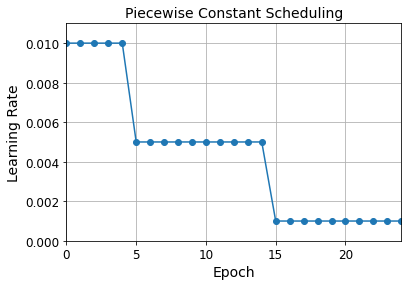

In [90]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Tốc độ học")
plt.title("Hoạch định Hằng số Từng phần", fontsize=14)
plt.grid(True)
plt.show()

### Định thời Năng lực

In [91]:
tf.random.set_seed(42)
np.random.seed(42)

In [92]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7116 - accuracy: 0.7769 - val_loss: 0.4869 - val_accuracy: 0.8478
Epoch 2/25
1719/1719 [==============================] - 2s 947us/step - loss: 0.4912 - accuracy: 0.8390 - val_loss: 0.5958 - val_accuracy: 0.8270
Epoch 3/25
1719/1719 [==============================] - 2s 987us/step - loss: 0.5222 - accuracy: 0.8379 - val_loss: 0.4869 - val_accuracy: 0.8584
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5061 - accuracy: 0.8467 - val_loss: 0.4588 - val_accuracy: 0.8548
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5216 - accuracy: 0.8469 - val_loss: 0.6096 - val_accuracy: 0.8300
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4984 - accuracy: 0.8546 - val_loss: 0.5359 - val_accuracy: 0.8498
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5104 - accuracy: 0.8579 - val_loss: 0.5457 - val_accur

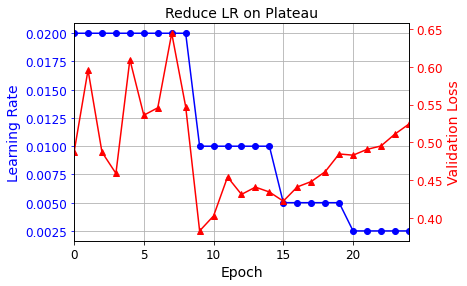

In [93]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Tốc độ học", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Mất mát Kiểm định', color='r')
ax2.tick_params('y', colors='r')

plt.title("Giảm LR trên Vùng bằng phẳng", fontsize=14)
plt.show()

### tf.keras schedulers

In [94]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5995 - accuracy: 0.7923 - val_loss: 0.4095 - val_accuracy: 0.8606
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3890 - accuracy: 0.8613 - val_loss: 0.3738 - val_accuracy: 0.8692
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3530 - accuracy: 0.8772 - val_loss: 0.3735 - val_accuracy: 0.8692
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3296 - accuracy: 0.8813 - val_loss: 0.3494 - val_accuracy: 0.8798
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3178 - accuracy: 0.8867 - val_loss: 0.3430 - val_accuracy: 0.8794
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2930 - accuracy: 0.8951 - val_loss: 0.3414 - val_accuracy: 0.8826
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2854 - accuracy: 0.8985 - val_loss: 0.3354 - val_accuracy:

Đối với định thời từng phần cố định, hãy thử:

In [95]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

### Định thời 1Cycle

In [96]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

**Cảnh báo**: Trong phương thức `on_batch_end()`, `logs["loss"]` được sử dụng để chứa mất mát batch, nhưng trong TensorFlow 2.2.0, nó được thay thế bằng mất mát trung bình (kể từ khi bắt đầu epoch). Điều này giải thích tại sao biểu đồ bên dưới mượt hơn nhiều so với trong sách (nếu bạn đang sử dụng TF 2.2 trở lên). 

Điều đó cũng có nghĩa là có độ trễ giữa thời điểm mất batch bắt đầu bùng nổ và thời điểm bùng nổ trở nên rõ ràng trên biểu đồ. Vì vậy, bạn nên chọn tốc độ học nhỏ hơn một chút so với mức bạn đã chọn với biểu đồ "nhiễu". Ngoài ra, bạn có thể điều chỉnh lệnh gọi lại `ExponentialLearningRate` ở trên để tính toán mất mát batch (dựa trên mất mát trung bình hiện tại và mất mát trung bình trước đó):


```python
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_epoch_begin(self, epoch, logs=None):
        self.prev_loss = 0
    def on_batch_end(self, batch, logs=None):
        batch_loss = logs["loss"] * (batch + 1) - self.prev_loss * batch
        self.prev_loss = logs["loss"]
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)
```

In [97]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.3120


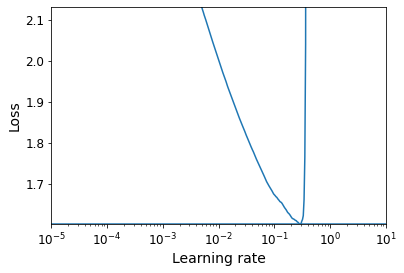

In [98]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [99]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [100]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 1s 2ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8338
Epoch 2/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4580 - accuracy: 0.8397 - val_loss: 0.4274 - val_accuracy: 0.8520
Epoch 3/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8545 - val_loss: 0.4116 - val_accuracy: 0.8588
Epoch 4/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3837 - accuracy: 0.8642 - val_loss: 0.3868 - val_accuracy: 0.8688
Epoch 5/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3639 - accuracy: 0.8719 - val_loss: 0.3766 - val_accuracy: 0.8688
Epoch 6/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8775 - val_loss: 0.3739 - val_accuracy: 0.8706
Epoch 7/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8811 - val_loss: 0.3635 - val_accuracy: 0.8708
Epoch 

# Tránh Quá khớp thông qua Điều chuẩn


## Điều chuẩn $\ell_1$ và $\ell_2$

In [101]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [102]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 3.2189 - accuracy: 0.7967 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7280 - accuracy: 0.8247 - val_loss: 0.6850 - val_accuracy: 0.8376


In [103]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 3.2911 - accuracy: 0.7924 - val_loss: 0.7218 - val_accuracy: 0.8310
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7282 - accuracy: 0.8245 - val_loss: 0.6826 - val_accuracy: 0.8382


## Dropout

In [104]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7611 - accuracy: 0.7576 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4306 - accuracy: 0.8401 - val_loss: 0.3395 - val_accuracy: 0.8722


## Alpha Dropout

In [105]:
tf.random.set_seed(42)
np.random.seed(42)

In [106]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8023 - accuracy: 0.7146 - val_loss: 0.5781 - val_accuracy: 0.8442
Epoch 2/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5663 - accuracy: 0.7905 - val_loss: 0.5182 - val_accuracy: 0.8520
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5264 - accuracy: 0.8054 - val_loss: 0.4874 - val_accuracy: 0.8600
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5126 - accuracy: 0.8092 - val_loss: 0.4890 - val_accuracy: 0.8598
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5071 - accuracy: 0.8133 - val_loss: 0.4266 - val_accuracy: 0.8696
Epoch 6/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4793 - accuracy: 0.8198 - val_loss: 0.4585 - val_accuracy: 0.8640
Epoch 7/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4724 - accuracy: 0.8262 - val_loss: 0.4740 - val_accuracy:

In [107]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 834us/step - loss: 0.4723 - accuracy: 0.8639


[0.47229740023612976, 0.8639000058174133]

In [108]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 1s 782us/step - loss: 0.3501 - accuracy: 0.8840


[0.3501231074333191, 0.8840363621711731]

In [109]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 0.4225 - accuracy: 0.8432


## MC Dropout

In [110]:
tf.random.set_seed(42)
np.random.seed(42)

In [111]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [112]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96]],
      dtype=float32)

In [113]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.57, 0.  , 0.42]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.93, 0.  , 0.05]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.46, 0.  , 0.53]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.24]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.43, 0.  , 0.51]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.28, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.06, 0.  , 0.81]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.07, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.28, 0.  , 0.64]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.29, 0.  , 0.7 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.22, 0.  , 0

In [114]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.22, 0.  , 0.68]],
      dtype=float32)

In [115]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.24, 0.  , 0.29]],
      dtype=float32)

In [116]:
y_pred = np.argmax(y_proba, axis=1)

In [117]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8661

In [118]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [119]:
tf.random.set_seed(42)
np.random.seed(42)

In [120]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [121]:
mc_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_262 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_263 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_264 (Dense)            (None, 10)              

In [122]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [123]:
mc_model.set_weights(model.get_weights())

Bây giờ ta có thể sử dụng mô hình với MC Dropout:

In [124]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.25, 0.01, 0.61]],
      dtype=float32)

## Max norm

In [125]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [126]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5763 - accuracy: 0.8020 - val_loss: 0.3674 - val_accuracy: 0.8674
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3545 - accuracy: 0.8709 - val_loss: 0.3714 - val_accuracy: 0.8662


# Bài tập

## 1. đến 7.

Tham khảo phụ lục A.

## 8. Học sâu với CIFAR10

### a.
*Bài tập: Xây dựng một DNN với 20 tầng ẩn, mỗi tầng 100 nơ-ron (khá là nhiều, nhưng đó là mục đích của bài tập này). Sử dụng khởi tạo He và hàm kích hoạt ELU.*

In [127]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))

### b.
*Bài tập: Sử dụng tối ưu hóa Nadam và dừng sớm, huấn luyện mạng trên tập dữ liệu CIFAR10. Bạn có thể tải nó bằng `keras.datasets.cifar10.load_data()`. Bộ dữ liệu bao gồm 60.000 hình ảnh màu 32 × 32–pixel (50.000 để huấn luyện, 10.000 để thử nghiệm) với 10 lớp, vì vậy bạn sẽ cần một tầng đầu ra softmax với 10 nơ-ron. Hãy nhớ tìm kiếm tốc độ học phù hợp mỗi khi bạn thay đổi kiến trúc hoặc siêu tham số của mô hình.*

Hãy thêm tầng đầu ra vào mô hình:

In [128]:
model.add(keras.layers.Dense(10, activation="softmax"))

Hãy sử dụng trình tối ưu hóa Nadam với tỷ lệ học là 5e-5. Tôi đã thử tốc độ học 1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3 và 1e-2, đồng thời so sánh các đường cong học tập của chúng trong 10 epochs cho mỗi tốc độc học (sử dụng lệnh gọi lại TensorBoard, bên dưới) . Tỷ lệ học tập 3e-5 và 1e-4 khá tốt, vì vậy tôi đã thử 5e-5 và có được kết quả tốt hơn một chút.

In [129]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

Hãy tải bộ dữ liệu CIFAR10. Chúng ta cũng muốn sử dụng tính năng dừng sớm, vì vậy ta cần một tập kiểm định. Hãy sử dụng 5,000 hình ảnh đầu tiên của tập huấn luyện ban đầu làm tập kiểm định:

In [130]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

Bây giờ ta có thể tạo các callback mà chúng ta cần và huấn luyện mô hình:

In [131]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [132]:
%tensorboard --logdir=./my_cifar10_logs --port=6006

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E0213 19:12:55.493896 4621630912 program.py:311] TensorBoard could not bind to port 6006, it was already in use
ERROR: TensorBoard could not bind to port 6006, it was already in use

In [133]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 9s 5ms/step - loss: 9.4191 - accuracy: 0.1388 - val_loss: 2.2328 - val_accuracy: 0.2040
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 2.1097 - accuracy: 0.2317 - val_loss: 2.0485 - val_accuracy: 0.2402
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9667 - accuracy: 0.2844 - val_loss: 1.9681 - val_accuracy: 0.2964
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8740 - accuracy: 0.3149 - val_loss: 1.9178 - val_accuracy: 0.3254
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8064 - accuracy: 0.3423 - val_loss: 1.8256 - val_accuracy: 0.3384
Epoch 6/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7525 - accuracy: 0.3595 - val_loss: 1.7430 - val_accuracy: 0.3692
Epoch 7/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7116 - accuracy: 0.3819 - val_loss: 1.7199 - val_ac

In [134]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 1.4960 - accuracy: 0.4762


[1.4960416555404663, 0.47620001435279846]

Mô hình có mất mát kiểm định thấp nhất có độ chính xác khoảng 47,6% trên tập kiểm định. Phải mất 27 epoch để đạt được mức mất mát kiểm định thấp nhất, với khoảng 8 giây mỗi epoch trên máy tính xách tay của tôi (không có GPU). Hãy xem liệu chúng ta có thể cải thiện hiệu suất bằng Chuẩn hóa theo Batch hay không.

### c.
*Bài tập: Bây giờ hãy thử thêm Chuẩn hóa theo Batch và so sánh các đường cong học tập: Nó có hội tụ nhanh hơn trước không? Liệu nó tạo ra một mô hình tốt hơn? Nó ảnh hưởng như thế nào đến tốc độ huấn luyện?*

Đoạn mã dưới đây rất giống với đoạn mã trên, với một vài thay đổi:

* Ta thêm một tầng BN sau mỗi tầng Dày đặc (trước hàm kích hoạt), ngoại trừ tầng đầu ra. Ta cũng thêm một tầng BN trước tầng ẩn đầu tiên.
* Ta thay đổi tỷ lệ học thành 5e-4. Ta thử nghiệm với 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3 và 3e-3 và chọn giá trị với hiệu suất kiểm định tốt nhất sau 20 epoch.
* Ta đổi tên các thư mục chạy thành run_bn_* và tên tệp mô hình thành my_cifar10_bn_model.h5.

In [135]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 19s 9ms/step - loss: 1.9765 - accuracy: 0.2968 - val_loss: 1.6602 - val_accuracy: 0.4042
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6787 - accuracy: 0.4056 - val_loss: 1.5887 - val_accuracy: 0.4304
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6097 - accuracy: 0.4274 - val_loss: 1.5781 - val_accuracy: 0.4326
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5574 - accuracy: 0.4486 - val_loss: 1.5064 - val_accuracy: 0.4676
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5075 - accuracy: 0.4642 - val_loss: 1.4412 - val_accuracy: 0.4844
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4664 - accuracy: 0.4787 - val_loss: 1.4179 - val_accuracy: 0.4984
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4334 - accuracy: 0.4932 - val_loss: 1.4277 -

[1.3343921899795532, 0.5397999882698059]

* *Mô hình có hội tụ nhanh hơn trước không?* Nhanh hơn nhiều! Mô hình trước đó mất 27 epoch để đạt được mức tổn thất xác thực thấp nhất, trong khi mô hình mới đạt được mức tổn thất tương tự chỉ trong 5 epoch và tiếp tục đạt được tiến bộ cho đến epoch thứ 16. Các tầng BN ổn định quá trình huấn luyện và cho phép chúng ta sử dụng tốc độ học lớn hơn nhiều, do đó, đạt được sự hội tụ nhanh hơn.
* *BN có tạo ra một mô hình tốt hơn không?* Có! Mô hình cuối cùng cũng tốt hơn nhiều, với độ chính xác 54,0% thay vì 47,6%. Nó vẫn không phải là một mô hình quá tốt, nhưng ít nhất nó cũng tốt hơn nhiều so với trước đây (Mạng nơ-ron Tích chập sẽ hoạt động tốt hơn nhiều, nhưng đó là một chủ đề khác, xem chương 14).
* *BN ảnh hưởng đến tốc độ huấn luyện như thế nào?* Mặc dù mô hình hội tụ nhanh hơn, nhưng mỗi epoch mất khoảng 12 giây thay vì 8 giây do các lớp BN yêu cầu tính toán bổ sung. Nhưng nhìn chung thời gian huấn luyện (wall time) đã được rút ngắn đáng kể!

### d.
*Bài tập: Hãy thử thay thế Chuẩn hóa theo Batch bằng SELU và thực hiện các điều chỉnh cần thiết để đảm bảo mạng tự chuẩn hóa (nghĩa là chuẩn hóa các đặc trưng đầu vào, sử dụng khởi tạo thông thường LeCun, đảm bảo DNN chỉ chứa một chuỗi các tầng dày đặc, v.v.) .*

In [136]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 10s 5ms/step - loss: 2.0622 - accuracy: 0.2631 - val_loss: 1.7878 - val_accuracy: 0.3552
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7328 - accuracy: 0.3830 - val_loss: 1.7028 - val_accuracy: 0.3828
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6342 - accuracy: 0.4279 - val_loss: 1.6692 - val_accuracy: 0.4022
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5524 - accuracy: 0.4538 - val_loss: 1.6350 - val_accuracy: 0.4300
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4979 - accuracy: 0.4756 - val_loss: 1.5773 - val_accuracy: 0.4356
Epoch 6/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4428 - accuracy: 0.4902 - val_loss: 1.5529 - val_accuracy: 0.4630
Epoch 7/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3966 - accuracy: 0.5126 - val_loss: 1.5290 - val_a

[1.4633383750915527, 0.47920000553131104]

In [137]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 1.4633 - accuracy: 0.4792


[1.4633383750915527, 0.47920000553131104]

Ta có được độ chính xác 47,9%, tốt hơn không nhiều so với mô hình ban đầu (47,6%) và không tốt bằng mô hình sử dụng Chuẩn hóa theo Batch (54,0%). Tuy nhiên, sự hội tụ gần như nhanh như với mô hình BN, cộng với việc mỗi epoch chỉ mất 7 giây. Vì vậy, nó là mô hình được huấn luyện nhanh nhất cho đến nay.

### e.
*Bài tập: Hãy thử chuẩn hóa mô hình bằng cách loại bỏ alpha. Sau đó, không cần huấn luyện lại mô hình của bạn, hãy xem liệu bạn có thể đạt được độ chính xác cao hơn khi sử dụng MC Dropout không.*

In [138]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 9s 5ms/step - loss: 2.0583 - accuracy: 0.2742 - val_loss: 1.7429 - val_accuracy: 0.3858
Epoch 2/100
1407/1407 [==============================] - 6s 5ms/step - loss: 1.6852 - accuracy: 0.4008 - val_loss: 1.7055 - val_accuracy: 0.3792
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5963 - accuracy: 0.4413 - val_loss: 1.7401 - val_accuracy: 0.4072
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5231 - accuracy: 0.4634 - val_loss: 1.5728 - val_accuracy: 0.4584
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4619 - accuracy: 0.4887 - val_loss: 1.5448 - val_accuracy: 0.4702
Epoch 6/100
1407/1407 [==============================] - 6s 5ms/step - loss: 1.4074 - accuracy: 0.5061 - val_loss: 1.5678 - val_accuracy: 0.4664
Epoch 7/100
1407/1407 [==============================] - 6s 5ms/step - loss: 1.3718 - accuracy: 0.5222 - val_loss: 1.5764 - val_ac

[1.4804893732070923, 0.48899999260902405]

Mô hình đạt độ chính xác 48,9% trên tập kiểm định. Con số này khá hơn một chút so với không có dropout (47,6%). Với tìm kiếm siêu tham số mở rộng, nó có thể làm tốt hơn (tôi đã thử tỷ lệ dropout là 5%, 10%, 20% và 40% và tỷ lệ học 1e-4, 3e-4, 5e-4 và 1e-3 ), nhưng có lẽ không tốt hơn nhiều trong trường hợp này.

Hãy sử dụng MC Dropout ngay bây giờ. Ta sẽ cần tầng `MCAlphaDropout` mà chúng ta đã sử dụng trước đó, vì vậy hãy sao chép nó ở đây cho thuận tiện:

In [139]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

Bây giờ, hãy tạo một mô hình mới, giống với mô hình mà chúng ta vừa huấn luyện (có cùng trọng số), nhưng với các tầng dropout `MCAlphaDropout` thay vì các tầng `AlphaDropout`:

In [140]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

Sau đó, hãy thêm một vài hàm tiện ích. Hàm đầu tiên sẽ chạy mô hình nhiều lần (10 theo mặc định) và nó sẽ trả về xác suất dự đoán lớp trung bình. Hàm thứ hai sẽ sử dụng các xác suất trung bình này để dự đoán lớp có khả năng nhất cho từng mẫu:

In [141]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

Bây giờ, hãy đưa ra dự đoán cho tất cả các mẫu trong tập kiểm định và tính toán độ chính xác:

In [142]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4892

Chúng ta không có được sự cải thiện về độ chính xác trong trường hợp này (vẫn ở mức chính xác 48,9%).

Vì vậy, mô hình tốt nhất mà chúng ta có trong bài tập này là mô hình Chuẩn hóa theo Batch.

### f.
*Bài tập: Huấn luyện lại mô hình của bạn bằng cách sử dụng định thời 1cycle và xem liệu nó có cải thiện tốc độ huấn luyện và độ chính xác của mô hình hay không.*

In [143]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

352/352 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1255


(9.999999747378752e-06,
 9.999868392944336,
 2.6167492866516113,
 3.9354368618556435)

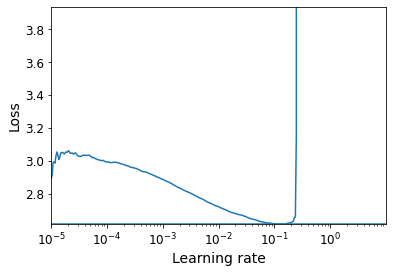

In [144]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [145]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [146]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 3s 6ms/step - loss: 2.2298 - accuracy: 0.2349 - val_loss: 1.7841 - val_accuracy: 0.3834
Epoch 2/15
352/352 [==============================] - 2s 6ms/step - loss: 1.7928 - accuracy: 0.3689 - val_loss: 1.6806 - val_accuracy: 0.4086
Epoch 3/15
352/352 [==============================] - 2s 6ms/step - loss: 1.6475 - accuracy: 0.4190 - val_loss: 1.6378 - val_accuracy: 0.4350
Epoch 4/15
352/352 [==============================] - 2s 6ms/step - loss: 1.5428 - accuracy: 0.4543 - val_loss: 1.6266 - val_accuracy: 0.4390
Epoch 5/15
352/352 [==============================] - 2s 6ms/step - loss: 1.4865 - accuracy: 0.4769 - val_loss: 1.6158 - val_accuracy: 0.4384
Epoch 6/15
352/352 [==============================] - 2s 6ms/step - loss: 1.4339 - accuracy: 0.4866 - val_loss: 1.5850 - val_accuracy: 0.4412
Epoch 7/15
352/352 [==============================] - 2s 6ms/step - loss: 1.4042 - accuracy: 0.5056 - val_loss: 1.6146 - val_accuracy: 0.4384
Epoch 

1Cycle cho phép chúng ta huấn luyện mô hình chỉ trong 15 epoch, mỗi epoch chỉ mất 2 giây (nhờ kích thước Batch lớn hơn). Tốc độ này nhanh hơn nhiều lần so với mô hình nhanh nhất mà chúng ta đã huấn luyện cho đến nay. Hơn nữa, chúng ta đã cải thiện hiệu suất của mô hình (từ 47,6% lên 52,0%). Mô hình chuẩn hóa theo batch đạt hiệu suất tốt hơn một chút (54%), nhưng huấn luyện chậm hơn nhiều.